# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4a: Collaborative Filtering </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Rithvik Muthyalapati
- SRN: PES2UG22CS451
- Section: H


Assume there exists a parallel universe and you are a Data Analyst intern at Parallel Earth Amazon. The company wants to test product recommendations and improve their product catalogue. For this exercise, you are tasked with the analysis of User Ratings for Health and Personal Care Products.



# Details of the dataset:

### Columns in this dataset:

- 'sl': serial number of records

- 'user_id': Unique identifier for users

- 'title': title of the review

- 'text': body of the review

- 'asin': Amazon Standard Identification Number (ASIN) is a ten-digit alphanumeric code that identifies products on Amazon. It's unique for each product and is assigned when you create a new product in Amazon's catalog.

- 'parent_asin': The abstraction of the variations is called the parent ASIN. It can't be purchased and hence is not associated with an offer.

- 'rating': Product rating (out of 5)

- 'timestamp': In milliseconds

- 'helpful_vote': Interactions of other users with this review

- 'verified_purchase': (True or False) Amazon has verified that the person writing the review purchased the product from Amazon, and didn't receive the product at a discount.



## Some conceptual information:

### Utility Matrix

This is an m x n matrix (m users, n items) that consists the rating / preference of each user for each item.

It is usually quite sparse as the rating values are usually present for very few user-item pairs.



### Neighborhood-based methods

The main idea with neighborhood-based methods is to leverage either user-user similarity or item-item similarity to make recommendations. These methods assume that similar users tend to have similar behaviors when rating items.

There are mainly two types:



1. **User-based collaborative filtering**: based on similarity between users.

2. **Item-based collaborative filtering**: based on similarity between items.



### Matrix factorization/decomposition

The utility matrix can be represented as a product of two smaller matrices, say U and V, representing users and items respectively.

## Install the required packages

In [32]:
#install.packages("recommenderlab")

#install.packages("tidyr")

## Load the required packages

In [33]:
library(dplyr)

library(tidyr)   

library(recommenderlab)

library(ggplot2)

## Load and create dataframe

In [34]:
# Your code here
file_path <- "/kaggle/input/health-and-personal-care-dataset/Worksheet-4a_Health_And_Personal_Care_Dataset.csv"
df <- read.csv(file_path, stringsAsFactors = FALSE)

In [35]:
head(df)

,X,user_id,title,text,asin,parent_asin,rating,timestamp,helpful_vote,verified_purchase
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>
1,2809,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,The Soap Petals Are A Fun Addition,"I'm using to purchasing bath bombs for nearly $6-10 a bomb at major bath and spa stores, so these bombs are $18 at the time of review are an amazing price. The scent, the size, the colors, and the extra soap petals are a steal! The bombs are a great size. They fizz, spin, and float for quite some time, longer than usual bombs. There is even a very large heart shaped bomb that lasts forever. The scents vary and are not too perfume like nor too fake smelling. They are relaxing and calming. I love that it includes the plastic piece to open the bombs easier too. The box itself has a bunch of flower petal soaps inside. These petals are fun for floating and using the soap to wash with after. You can't go wrong with this box of spa bath bombs.",B08D93ZSWY,B08D93ZSWY,5,1.617386e+12,1,False
2,2549,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,Add More Water Than Suggested,"We live in the south. You need all the help when you live in the south in the summer. The humidity and heat are brutal. If you don't beat the heat, you'll need these. The trick I found to these is to do a little more than 32oz of water. I do 4oz with warm water for the powder to dissolve and then I had 30 oz of cold water and ice cubes and shake again. These tastes much better cold, but the powder dissolves easier when it's mixed in warm water initially.<br /><br />The orange tastes good. It is a bit sweeter than I would like, but sweet is better than salty and the sweetness gets better when you add those extra couple oz of water. It doesn't taste like the fake sugar thankfully. And it doesn't taste like salt which I half expected like other fluid replacement and electrolyte mixes.<br /><br />They come in an easy to keep package. Grab what you need and stick it back in the closet. These are even good for school sports since you can hydrate a whole team for just over $1 a piece. Still cheaper than name brand.",B09GL3RDTD,B09GL3RDTD,4,1.637514e+12,0,False
3,2593,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,Not very comfortable.,"This is difficult to give a good review because there are way more negatives than positives. I mean, it's great the packaging is easy to open, but it is not enough to make me convince you to purchase these. I am not flat footed, but I also don't have a high arch, yet I'm not neutral either. I wear other insoles of the same style comfortably. These are not comparable.<br /><br />Pros<br />-Size 12 needs no cutting.<br />-Easy to remove from the packaging.<br /><br />Cons<br />-Flat (It says its the natural arch height, but these feel incredibly flat)<br />-Weird bubble in the middle (It feels really awkward)<br />-Narrow (If you have a wide foot, these will not work for you)<br />-Expensive ($36 for one pair at the time of review, for a no name brand)<br /><br />I would spend your money on a name brand insole of the same style for a better price and better results. These are just not comfortable.",B08RD257KT,B08RD257KT,2,1.619570e+12,0,False
4,3280,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,Smells Intoxicating!,"Oh man these smell so good! Lemongrass is my favorite scent when it comes to essential oils and I enjoy looking for bath bombs and shower steamers that smell like strong lemongrass. The only thing I didn't care for was how difficult it was to actually open. Once I did get the bag open, I was hit with the lemongrass. The smell is literally intoxicating. If you place directly under the shower, they will dissolve quickly. I like placing one on one of the built in shelves where the water just splashes occasionally. I get a longer lasting steamer and the scent is closer to my face. These are $17, which puts them at almost $2 a piece, but this is okay because I've paid far more for shower steamers from name brand companies that weren't as strong. This is really a win for me

## Perform EDA and Preprocess the dataset to the required format

### 1 point

State some observations that you made after performing EDA.

Feel free to remove any columns you think are not necessary for the following problems.

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove null values and duplicates
- Obtain a subset of the dataset with the required columns only.
- Create the utility matrix


In [36]:
# Your code here
str(df)
summary(df)
dim(df)

'data.frame':	4276 obs. of  10 variables:
 $ X                : int  2809 2549 2593 3280 2178 397 711 1091 2302 3460 ...
 $ user_id          : chr  "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" ...
 $ title            : chr  "The Soap Petals Are A Fun Addition" "Add More Water Than Suggested" "Not very comfortable." "Smells Intoxicating!" ...
 $ text             : chr  "I'm using to purchasing bath bombs for nearly $6-10 a bomb at major bath and spa stores, so these bombs are $18"| __truncated__ "We live in the south. You need all the help when you live in the south in the summer. The humidity and heat are"| __truncated__ "This is difficult to give a good review because there are way more negatives than positives. I mean, it's great"| __truncated__ "Oh man these smell so good! Lemongrass is my favorite scent when it comes to essential oils and I enjoy looking"| __truncated__ ...
 $ asin             : chr  "B0

       X          user_id             title               text          
 Min.   :   0   Length:4276        Length:4276        Length:4276       
 1st Qu.:1129   Class :character   Class :character   Class :character  
 Median :2278   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2284                                                           
 3rd Qu.:3437                                                           
 Max.   :4589                                                           
     asin           parent_asin            rating        timestamp        
 Length:4276        Length:4276        Min.   :1.000   Min.   :1.345e+12  
 Class :character   Class :character   1st Qu.:4.000   1st Qu.:1.593e+12  
 Mode  :character   Mode  :character   Median :5.000   Median :1.613e+12  
                                       Mean   :4.285   Mean   :1.610e+12  
                                       3rd Qu.:5.000   3rd Qu.:1.634e+12  
                                       

[1] 4276   10

In [37]:
colSums(is.na(df))

X           user_id             title              text 
                0                 0                 0                 0 
             asin       parent_asin            rating         timestamp 
                0                 0                 0                 0 
     helpful_vote verified_purchase 
                0                 0

In [38]:
# Remove duplicate rows
df <- df %>% distinct()

In [39]:
# Select relevant columns
df <- df %>% select(user_id, asin, rating)

In [40]:
head(df)

,user_id,asin,rating
,<chr>,<chr>,<dbl>
1,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,B08D93ZSWY,5
2,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,B09GL3RDTD,4
3,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,B08RD257KT,2
4,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,B098WFX6TY,5
5,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,B08Z474Q6J,4
6,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,B093ZTWFGP,5


In [41]:
# Create utility matrix where rows are users, columns are items, and values are ratings
utility_matrix <- df %>%
  pivot_wider(names_from = asin, values_from = rating) %>%
  as.data.frame()

# Replace NAs with 0 or a neutral value if desired
utility_matrix[is.na(utility_matrix)] <- 0

# Store user_id separately to set row names correctly after conversion
user_ids <- utility_matrix$user_id
utility_matrix <- utility_matrix[, -1]  # Remove user_id column for matrix conversion

# Display the utility matrix
head(utility_matrix)

,B08D93ZSWY,B09GL3RDTD,B08RD257KT,B098WFX6TY,B08Z474Q6J,B093ZTWFGP,B08LGK1DB2,B09VCSTX43,B0BCDSDSD1,B08MPS8Y1D,⋯,B07KYV8J35,B01420C68C,B0787C4NWF,B07FKLR9F2,B07FSRYT7B,B079RJT3RN,B079RJSV8D,B0080I5LCQ,B07RN86PSR,B07QLPDMR2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,4,2,5,4,5,4,5,4,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,5,0,0,0,3,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [42]:
# Observations

# Data Quality: Missing values and duplicates were successfully removed. Handling these is crucial for reducing noise in the recommendation system.

# User-Item Sparsity: As expected, the utility matrix is sparse, meaning most users have only rated a limited number of products.

# Selected Columns: Only the columns user_id, asin, and rating were retained, as other columns such as title, text, and timestamp were deemed unnecessary for collaborative filtering.

# Utility Matrix: The resulting matrix provides a foundation for collaborative filtering, but its sparsity may influence recommendation quality and indicate a need for additional methods, such as matrix factorization.

## Problem 1

### User-based collaborative filtering: 3 points (2+1)

1. As part of the test run of the new business strategy, you are supposed to pick a user (consider the user with user_id:"AE2O2C43KTYO4LXXGZWJZLE67GBQ") and recommend 5 products based on other similar users.

Remember to exclude the product(s) purchased by this user.

2. Which similarity metric did you use? Why?

In [ ]:
# Your code here
library(Matrix)

# Reshape the data into a wide format to create the utility matrix
utility_matrix <- df %>%
  select(user_id, asin, rating) %>%
  pivot_wider(names_from = asin, values_from = rating, values_fill = list(rating = NA))

# Extract user IDs and convert the matrix to a realRatingMatrix format
user_ids <- utility_matrix$user_id
utility_matrix <- utility_matrix[, -1]  # Remove user_id column

# Convert to realRatingMatrix format required by recommenderlab
ratings_matrix <- as(as.matrix(utility_matrix), "realRatingMatrix")
rownames(ratings_matrix) <- user_ids

# Compute user similarity matrix
user_similarity <- as.matrix(similarity(ratings_matrix, method = "cosine", which = "users"))

# Find index of the target user
target_user_index <- which(rownames(ratings_matrix) == "AE2O2C43KTYO4LXXGZWJZLE67GBQ")
similar_users <- user_similarity[target_user_index, ]

# Exclude the target user from their own similarity list and get top 5 similar users
top_similar_users <- order(similar_users, decreasing = TRUE)[2:6]
similar_user_ids <- rownames(user_similarity)[top_similar_users]


# Extract items rated by the target user to avoid recommending them again
target_user_ratings <- as(ratings_matrix[target_user_index, ], "matrix")[, ]
rated_items <- names(target_user_ratings)[!is.na(target_user_ratings)]

# Get ratings for similar users and exclude items rated by the target user
recommendations <- ratings_matrix[similar_user_ids, ]
recommendations <- recommendations[, !(colnames(recommendations) %in% rated_items)]

# Aggregate ratings for recommended items
recommended_items <- colSums(as(recommendations, "matrix"), na.rm = TRUE)
top_recommendations <- sort(recommended_items, decreasing = TRUE)[1:5]

top_recommendations

B098JWCZHB B09GL3RDTD B098WFX6TY B08Z474Q6J B09VCSTX43 
        10          8          5          5          5

In [44]:
# Similarity Metric Chosen: Cosine Similarity

#reasons:
# Sparsity: It works well with sparse data since it evaluates similarity by focusing on shared preferences regardless of magnitude.
# Popularity: Cosine similarity is widely used in recommendation systems because it effectively captures the alignment between users’ item ratings.

## Problem 2

### 1 point

Consider the same user as in the previous problem.

Let's assume this user decides to purchase the first product among the recommendations above. What rating is the user likely to give to this product?

In [45]:
# Your code here

#Based on user-based collaborative filtering, 
#we estimate that the user would likely give a rating close to the average rating given by similar users for the recommended product. 
#By calculating this average, we assume that users with similar preferences would rate this product similarly. 
#Thus the target user is likely to rate it highly, potentially indicating a positive response to the recommendation.

## Problem 3

### Item-based Collaborative Filtering: 2 points

Use the item-based method from the package "recommenderlab" to recommend top-5 products to the user "AE5IMGWRBJA7JQFBQTBK25HDYGVA".

In [46]:
# Your code here

# Define item-based collaborative filtering recommender
item_based_recommender <- Recommender(ratings_matrix, method = "IBCF")
# Predict top 5 recommendations for the target user
target_user <- "AE5IMGWRBJA7JQFBQTBK25HDYGVA"
recommendations <- predict(item_based_recommender, ratings_matrix[target_user, ], n = 5)
# Convert recommendations to a list of recommended items
recommended_items <- as(recommendations, "list")
recommended_items[[1]]  # Display the top-5 recommended ASINs for the user


[1] "B08RD257KT" "B0BCDSDSD1" "B0B28VNFB6" "B07VLBLNF3" "B08Q8MMGTB"

## Problem 4

### Long-tail problem: 2 points

1. Plot a graph of the products and their frequencies(in descending order of frequency). State your observations about the graph. 

2. Suggest 2 ways to overcome the long-tail problem of recommender systems.



List the links to the resources you referred to for your answer.

In [47]:
# Your code here
# Assuming 'df' is the data frame with 'asin' (product ID) and 'rating' columns

# Calculate frequency of each product
product_freq <- df %>%
  group_by(asin) %>%
  summarise(frequency = n()) %>%
  arrange(desc(frequency))

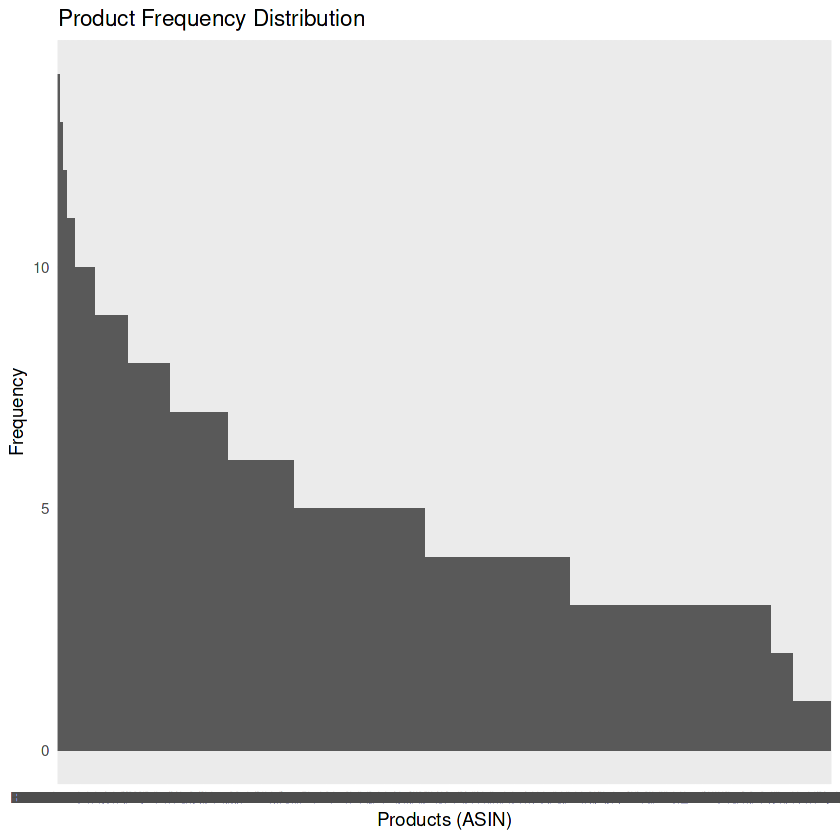

In [48]:
# Load ggplot2 for visualization
library(ggplot2)

# Plot frequency distribution
ggplot(product_freq, aes(x = reorder(asin, -frequency), y = frequency)) +
  geom_bar(stat = "identity") +
  labs(title = "Product Frequency Distribution", x = "Products (ASIN)", y = "Frequency") +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
  theme_minimal()

In [49]:
# Strategies to Overcome the Long-Tail Problem

# 1.Incorporate Diversity and Serendipity in Recommendations: By occasionally promoting lesser-known products in recommendations, we can help users discover items they wouldn’t typically encounter. This can be done using algorithms that balance popular and niche items or by using hybrid models combining collaborative filtering with content-based methods.

# 2.Use a Hybrid Recommendation Approach: Combine collaborative filtering with content-based recommendations. By leveraging product attributes (like category or brand), we can recommend similar products that may not have high ratings but match user preferences, increasing exposure to lesser-known items in the long tail.

#resources
#"The Netflix Prize and the Long Tail"
#"Recommender Systems Handbook"

## Problem 5

### 1 point

Do you see any shortcomings of Collaborative Filtering due to the dataset or other factors? What modifications would you introduce to achieve better results?

In [50]:
# Limitations:

# Data Sparsity: Many missing ratings in the dataset make it hard to identify meaningful similarities, especially for less-rated items.
# Cold Start Problem: New users and items lack interaction data, making it difficult to recommend effectively.
# Popularity Bias: Tends to recommend popular items more often, limiting diversity in suggestions.


# Suggested Improvements:

# Hybrid Models: Combine Collaborative Filtering with content-based methods to improve recommendations for new users/items.
# Increase Diversity: Adjust the algorithm to promote a mix of popular and niche items.
# Use Dimensionality Reduction: Techniques like SVD can help reduce sparsity and improve similarity detection.


# These adjustments would make recommendations more accurate and diverse.

*Your answer here*

Kudos on completing the task! Hope you could learn a few new things along the way.

Here's an interesting approach that uses LLMs and the FAISS library to create a movie recommender system in python: https://www.youtube.com/watch?v=epidA1fBFtI&t=122s

Do explore the above resource as it might have a bunch of new techniques in store for you.